In [1]:
import torch
import time
import cv2
import matplotlib as plt
import gym
from Gridworld_Game import Gridworld

In [2]:
GRID_SIZE = 4
env = Gridworld(Grid_size=GRID_SIZE, mode='static')

In [3]:
env.observation_space

Box(0, 1, (4, 4, 4), int32)

In [4]:
env.actions_space

Discrete(4)

In [5]:
action = env.actions_space.sample()
action

2

In [6]:
env.reset()
env.render(mode='human')
time.sleep(10)
env.close()

In [15]:
env.step(action)
env.reset()
env.render(mode='human')
time.sleep(10)
env.close()

In [7]:
actions = {'left': 0, 'right': 1, 'up': 2, 'down': 3}

In [8]:
env.step(actions['right'])

(array([[[0, 0, 0, 0],
         [1, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0],
         [0, 0, 1, 0]]]),
 -1,
 False,
 {'items': {'Agent': 0, 'Hole': 1, 'Wall': 2, 'Goal': 3},
  'Grid_size': 4,
  'actions': ['Left', 'Right', 'Up', 'Down']})

In [9]:
class Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 150)
        self.linear2 = torch.nn.Linear(150, 100)
        self.linear3 = torch.nn.Linear(100, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [10]:
EPOCHS = 3000
NUM_OBJECTS = 4
INPUT_SHAPE = GRID_SIZE**2 * NUM_OBJECTS
OUTPUT_SHAPE = len(actions)
INPUT_SHAPE

64

In [11]:
Agent = Net(INPUT_SHAPE, OUTPUT_SHAPE)
Agent

Net(
  (linear1): Linear(in_features=64, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=4, bias=True)
  (activation): ReLU()
)

In [12]:
import numpy as np

In [13]:
def preprocess_state(state, input_shape, add_noise=False):
    # best practice to add noise to the state to avoid overfitting, input_shape is a tuple here
    if add_noise == True:
        state = state.reshape(*input_shape) + np.random.rand(*input_shape)/10.0
    else:
        state = state.reshape(*input_shape)
    return state
        

In [14]:
game = Gridworld(Grid_size=GRID_SIZE, mode='static')
state1 = game.state
state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
state1

array([[1.0093209 , 0.08952649, 0.08749814, 0.02068746, 0.05236501,
        0.06388743, 0.06044272, 0.02348235, 0.07998512, 0.06415988,
        0.07850741, 0.07181711, 0.04545091, 0.03959819, 0.03335383,
        0.06895059, 0.03077744, 0.09690437, 0.01996707, 0.05792077,
        0.08578672, 1.09302714, 0.09167514, 0.03979255, 0.02020389,
        0.08676662, 0.04007823, 0.02901621, 0.08477838, 0.03212597,
        0.03755088, 0.05645068, 0.00818415, 0.05716458, 0.04542502,
        0.01718968, 0.05827016, 0.05549441, 0.0477337 , 0.07607267,
        0.02218827, 0.09894839, 0.08464463, 0.02930795, 0.0600194 ,
        0.00857825, 0.09079456, 0.01991729, 0.08431928, 0.03728681,
        0.06101486, 0.01270645, 0.09005304, 0.02054528, 0.01563512,
        1.04117731, 0.04572271, 0.01966509, 0.04721014, 0.09359007,
        0.01163716, 0.07776199, 1.04451978, 0.04991746]])

In [15]:
x = torch.Tensor([2.0])
x.detach?

Docstring:
Returns a new Tensor, detached from the current graph.

The result will never require gradient.

This method also affects forward mode AD gradients and the result will never
have forward mode AD gradients.

.. note::

  Returned Tensor shares the same storage with the original one.
  In-place modifications on either of them will be seen, and may trigger
  errors in correctness checks.
  IMPORTANT NOTE: Previously, in-place size / stride / storage changes
  (such as `resize_` / `resize_as_` / `set_` / `transpose_`) to the returned tensor
  also update the original tensor. Now, these in-place changes will not update the
  original tensor anymore, and will instead trigger an error.
  For sparse tensors:
  In-place indices / values changes (such as `zero_` / `copy_` / `add_`) to the
  returned tensor will not update the original tensor anymore, and will instead
  trigger an error.
Type:      builtin_function_or_method

In [16]:
import random

In [17]:
random.random?

Signature: random.random()
Docstring: random() -> x in the interval [0, 1).
Type:      builtin_function_or_method

In [18]:
def get_action(Q_val, num_actions, epsilon):
    if (random.random() < epsilon):
        action = np.random.randint(0, 4)
    else:
        action = np.argmax(Q_val, 1)[0]
    return action
    

In [19]:
# test get_action
epsilon = 1.0

state1 = torch.from_numpy(state1).float()
Q_val = Agent(state1) # returns a tensor with 4 elements
Q_val_numpy = Q_val.detach().numpy()
action = get_action(Q_val_numpy, len(actions), epsilon)
action    

3

In [20]:
Q_val_numpy

array([[-0.01387687, -0.06077883,  0.03941692,  0.05066709]],
      dtype=float32)

In [21]:
class target_maker:
    def __init__(self, terminal_rewards):
        self.terminal_rewards = terminal_rewards  # +10 for reaching target, -10 for falling in hole

    def __call__(self, current_reward, gamma, maxQ):
        if current_reward not in self.terminal_rewards: #N
            Y = current_reward + (gamma * maxQ)
        else:
            Y = current_reward
        Y = torch.Tensor([Y]).detach()
        return Y
            

In [23]:
# training loop
gamma = 0.9
terminal_rewards = [-10, +10]
create_target = target_maker(terminal_rewards)
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(Agent.parameters(), lr=learning_rate)
losses = []

for i in range(EPOCHS):
    game = Gridworld(Grid_size=GRID_SIZE, mode='static')
    state1 = game.state  # state1.shape == (4, 4, 4)
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float()
    gate = 1
    while gate == 1:
        Q_val = Agent(state1) # returns a tensor with 4 elements
        Q_val_numpy = Q_val.detach().numpy()
        action = get_action(Q_val_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float()
        game.render()
        with torch.no_grad():
            newQ = Agent(state2)
        maxQ = torch.max(newQ)
        Y = create_target(reward, gamma, maxQ)
        X = Q_val.squeeze()[action]  # previously tensor([[value1, value2, etc..]])
        loss = loss_fn(X, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        state1 = state2
        losses.append(loss)
        if done == True:
            gate = 0
    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)
    game.close()
        

In [24]:
for i in range(4):
    game = Gridworld(Grid_size=GRID_SIZE, mode='static')
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float()
    gate = 1
    while gate == 1:
        Q_val = Agent(state1)
        Q_val_numpy = Q_val.detach().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float()
        game.render()
        time.sleep(1)
        state1 = state2
        if done == True:
            gate = 0
            game.close()
        

In [22]:
from collections import deque

In [23]:
Q_val

tensor([[-0.0139, -0.0608,  0.0394,  0.0507]], grad_fn=<AddmmBackward0>)

In [24]:
Q_val.data

tensor([[-0.0139, -0.0608,  0.0394,  0.0507]])

In [25]:
MEMORY_SIZE = 5000
BATCH_SIZE = 200

replay = deque(maxlen=MEMORY_SIZE)  # replay buffer

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
GPUAgent = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)

In [28]:
GPUAgent

Net(
  (linear1): Linear(in_features=64, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=4, bias=True)
  (activation): ReLU()
)

In [32]:
!pip install tqdm

In [29]:
from tqdm.auto import tqdm

In [30]:
def get_batch(replay, batch_size, device="cpu"):
    minibatch = random.sample(replay, batch_size)
    state1_batch = torch.cat([s1 for (s1, a, r, s2, d) in minibatch]).to(device)
    action_batch = torch.Tensor([a for (s1, a, r, s2, d) in minibatch]).long().to(device)
    reward_batch = torch.Tensor([r for (s1, a, r, s2, d) in minibatch]).to(device)
    state2_batch = torch.cat([s2 for (s1, a, r, s2, d) in minibatch]).to(device)
    done_batch = torch.Tensor([d for (s1, a, r, s2, d) in minibatch]).to(device)
    return state1_batch, action_batch, reward_batch, state2_batch, done_batch
    

In [31]:
def batch_target(reward_batch, gamma, maxQ, done_batch):
    Y = reward_batch + (gamma * maxQ * (1 - done_batch))
    return Y

In [32]:
def reward_metric(all_rewards_list, last_n_rewards = 20):
    print(len(all_rewards_list))
    if len(all_rewards_list) >= last_n_rewards:
        mean_reward = np.mean(all_rewards_list[-last_n_rewards:])
    else:
        mean_reward = 0
    return mean_reward

In [33]:
def update(loss, optimizer):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [34]:
from IPython.display import clear_output

In [35]:
loss_fn = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(GPUAgent.parameters(), lr=0.001)

In [45]:
epsilon = 1.0

for i in tqdm(range(EPOCHS)):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800,800,3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while status == 1:
        qval = GPUAgent(state1)
        qval_numpy = qval.data.detach().cpu().numpy()
        action = get_action(qval_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)

        exp = (state1, action, reward, state2, done)
        replay.append(exp)

        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = GPUAgent(state1_batch)

            with torch.no_grad():
                Q2 = GPUAgent(state2_batch)
            maxQ = torch.max(Q2, axis = 1)[0].to(device)  # returns maxQ tensor

            Y = batch_target(reward_batch, gamma, maxQ, done_batch).to(device)

            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze().to(device)
            loss = loss_fn(X, Y)
            print(i, loss.item())
            clear_output(wait=True)

            losses.append(loss.item())
            update(loss, optimizer)
        
        state1 = state2.to(device)
        if done == True:
            status = 0

    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

2999 0.15237745642662048


In [46]:
for i in range(20):
    game = Gridworld(Grid_size=GRID_SIZE, mode='random')
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    gate = 1
    while gate == 1:
        Q_val = GPUAgent(state1)
        Q_val_numpy = Q_val.detach().cpu().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        state1 = state2
        game.render()
        time.sleep(1)
        state1 = state2
        if done == True:
            gate = 0
            game.close()
        

In [63]:
GPUAgent = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)

loss_fn = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(GPUAgent.parameters(), lr=learning_rate)

In [67]:
epsilon = 1.0
EPOCHS = 1000

all_rewards_list = []
mean_rewards = []

for i in tqdm(range(EPOCHS)):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800,800,3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while status == 1:
        qval = GPUAgent(state1)
        qval_numpy = qval.data.detach().cpu().numpy()
        action = get_action(qval_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)

        exp = (state1, action, reward, state2, done)
        replay.append(exp)

        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = GPUAgent(state1_batch)

            with torch.no_grad():
                Q2 = GPUAgent(state2_batch)
            maxQ = torch.max(Q2, axis = 1)[0].to(device)  # returns maxQ tensor

            Y = batch_target(reward_batch, gamma, maxQ, done_batch).to(device)

            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze().to(device)
            loss = loss_fn(X, Y)
            print(i, loss.item())

            losses.append(loss.item())
            update(loss, optimizer)

            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 100)
            mean_rewards.append(mean_reward)

            print(reward, mean_reward)
            clear_output(wait=True)
        
        state1 = state2.to(device)
        if done == True:
            status = 0

    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

KeyboardInterrupt: 

Text(0, 0.5, 'rewards')

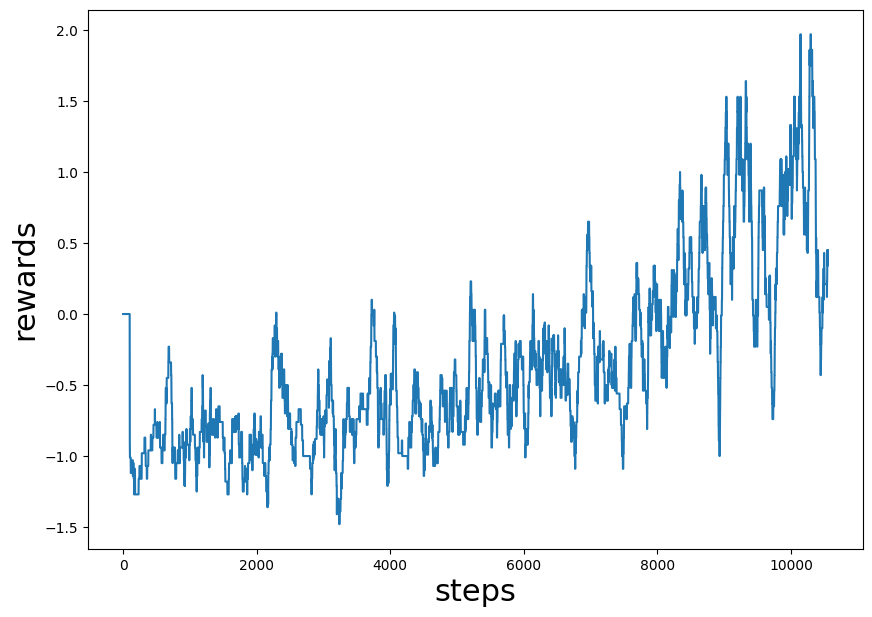

In [66]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.xlabel("steps", fontsize=22)
plt.ylabel("rewards", fontsize=22)

In [36]:
import matplotlib.pyplot as plt

In [ ]:
from collections import deque
import copy

MEMORY_SIZE = 5000
BATCH_SIZE = 200
EPOCHS = 10000
replay = deque(maxlen=MEMORY_SIZE)
max_moves = 50
gamma = 0.9
learning_rate = 0.001
sync_freq = 30
k = 0
losses = []
Agent_NN = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)
Target_NN = copy.deepcopy(Agent_NN)
Target_NN.load_state_dict(Agent_NN.state_dict())

optimizer1 = torch.optim.Adam(Agent_NN.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
epsilon = 1.0

all_rewards_list = []
mean_rewards = []

for i in range(EPOCHS):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800, 800, 3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    mov = 0
    while status == 1:
        k += 1
        qval = Agent_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()

        action = get_action(qval_, 4, epsilon)
        state2, reward, done, _ = game.step(action)

        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        exp = (state1, action, reward, state2, done)
        replay.append(exp)
        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = Agent_NN(state1_batch)
            with torch.no_grad():
                Q2 = Target_NN(state2_batch)
            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y)
            print(i, loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            update(loss, optimizer)

            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 100)
            mean_rewards.append(mean_reward)

        state1 = state2

        if k % sync_freq == 0:
            Target_NN.load_state_dict(Agent_NN.state_dict())
        
        if done == True:
            status = 0
    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

177451
4801 2.387934446334839
